In [0]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder
!mv stylegan-encoder/* stylegan-encoder/.git .
!rmdir stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 189 (delta 2), reused 7 (delta 2), pack-reused 179
Receiving objects: 100% (189/189), 10.42 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (82/82), done.


Next, let's get some test images to work with... These are from Pexels, which has free stock photos.

In [ ]:
!mkdir aligned_images raw_images
!wget -O raw_images/stock_photo.jpg 'https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'
!wget -O raw_images/stock_photo2.jpg 'https://images.pexels.com/photos/1445467/pexels-photo-1445467.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'

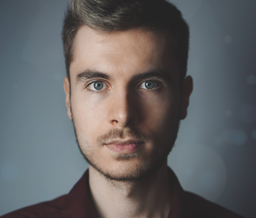

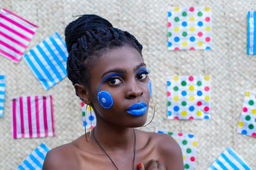

In [3]:
import PIL.Image
img1 = PIL.Image.open('raw_images/stock_photo.jpg')
wpercent = (256/float(img1.size[0]))
hsize = int((float(img1.size[1])*float(wpercent)))
img1 = img1.resize((256,hsize), PIL.Image.LANCZOS)
img2 = PIL.Image.open('raw_images/stock_photo2.jpg')
wpercent = (256/float(img2.size[0]))
hsize = int((float(img2.size[1])*float(wpercent)))
img2 = img2.resize((256,hsize), PIL.Image.LANCZOS)
display(img1,img2)

Now we need to get just the faces, cropped and aligned... fortunately, there's already a script for this!

In [4]:
!python align_images.py raw_images/ aligned_images/

Using TensorFlow backend.


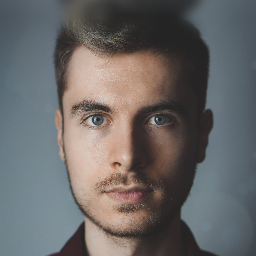

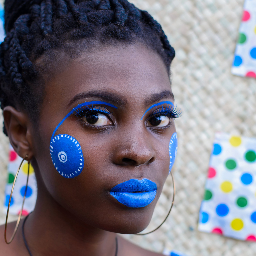

In [5]:
display(PIL.Image.open('aligned_images/stock_photo_01.png').resize((256,256)))
display(PIL.Image.open('aligned_images/stock_photo2_01.png').resize((256,256)))

Finally, let's try encoding some images into a latent representation! That's what you came here for, right? Let's just do a quick encoding, and see how we do...

In [ ]:
!python encode_images.py --batch_size=2 --output_video=True aligned_images/ generated_images/ latent_representations/

Ok, let's see how we did! Note the paths above, the generated image is in the generated_images folder, the latent representation is in the latent_representations folder, and since we generated videos of the training process, by default those are in the videos folder.

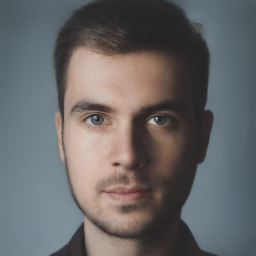

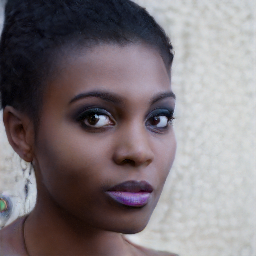

In [7]:
display(PIL.Image.open('generated_images/stock_photo_01.png').resize((256,256)))
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((256,256)))

Great job, everybody, nailed it! ... wait, what's that you say, the second image doesn't quite look the same? Hmm... let's try to do a better job, shall we?

In [ ]:
!mv aligned_images/stock_photo_01.png .
!python encode_images.py --output_video=True --lr=0.002 --iterations=1000 --use_l1_penalty=0.2 aligned_images/ generated_images/ latent_representations/
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((512,512)))